In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()
# Values are repetitve so it's probably a categorical attribute.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

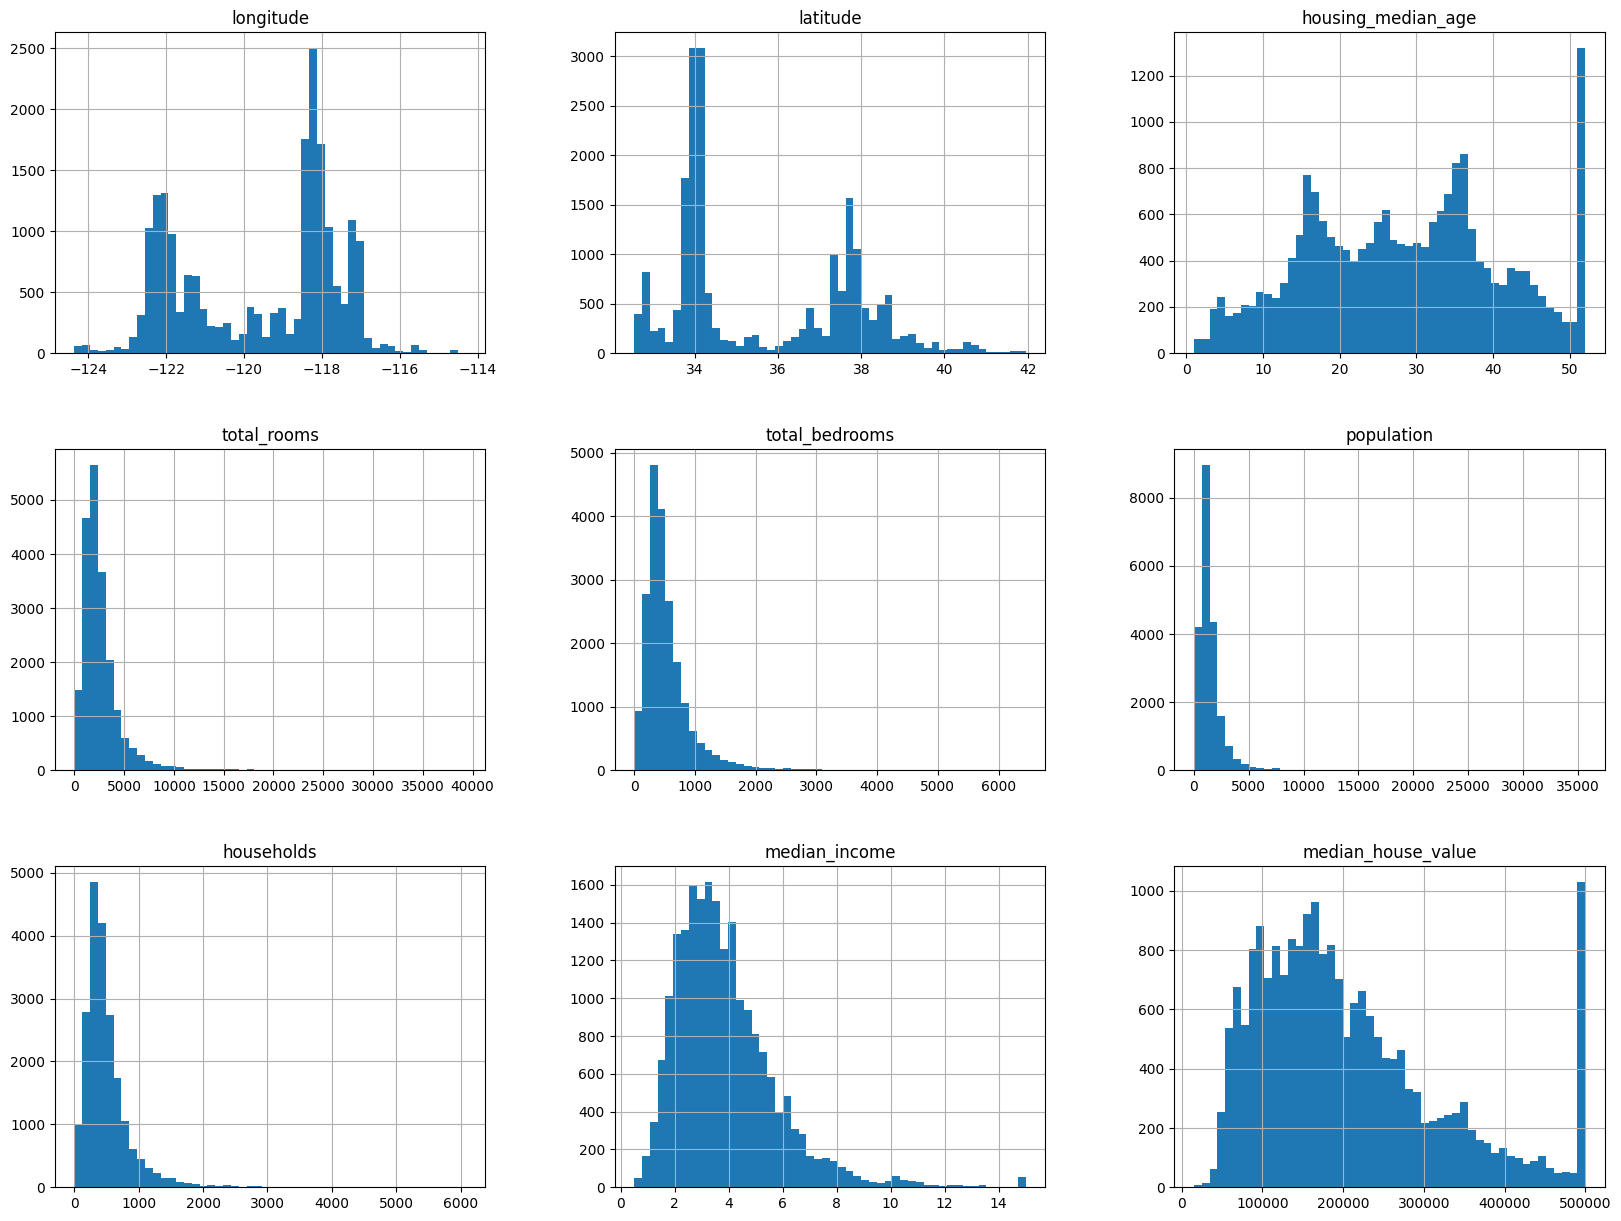

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

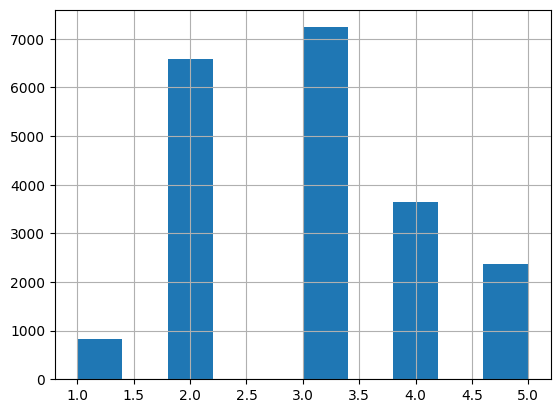

In [8]:
df['income_category']=pd.cut(df['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df['income_category'].hist()

In [9]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [10]:
train.drop(columns='income_category', inplace=True)
test.drop(columns='income_category', inplace=True)

In [11]:
train_copy=train.copy()

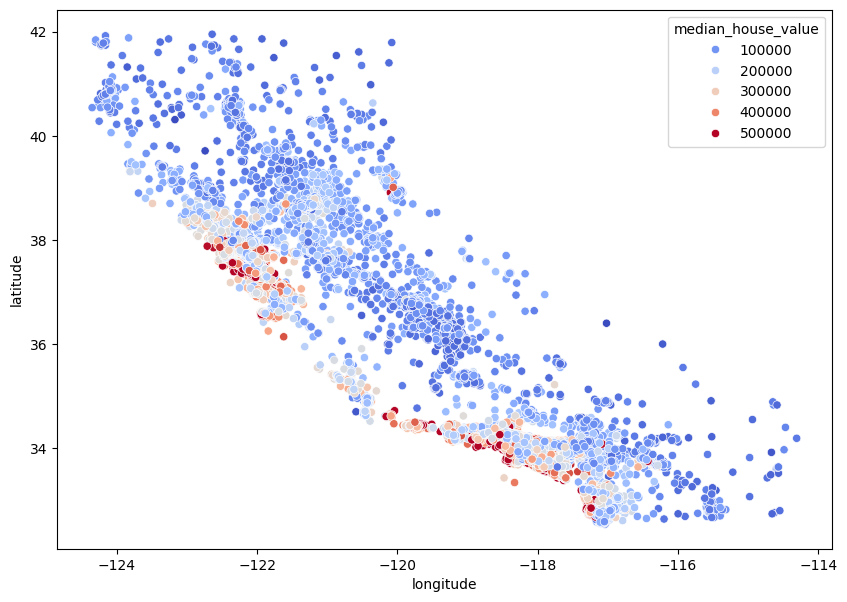

In [12]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train_copy, x="longitude", y="latitude", hue='median_house_value', palette='coolwarm')
plt.show()

<Axes: >

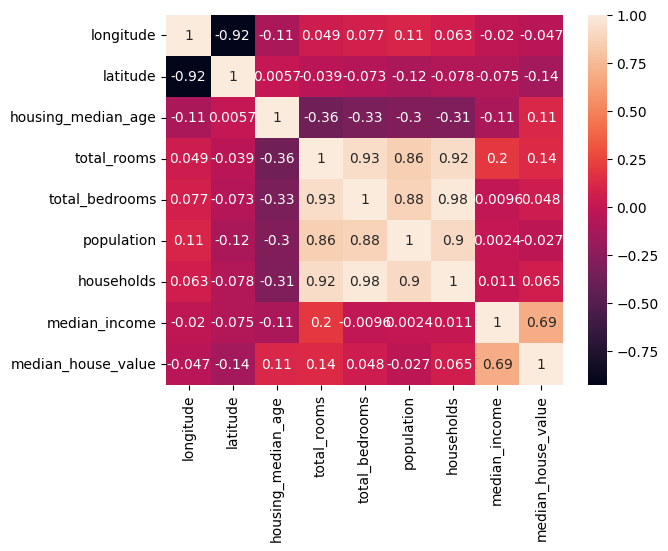

In [13]:
corr_matrix=train_copy.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

#results backup:
#median_house_value    1.000000
#median_income         0.687151
#total_rooms           0.135140
#housing_median_age    0.114146
#households            0.064590
#total_bedrooms        0.047781
#population           -0.026882
#longitude            -0.047466
#latitude             -0.142673
#Name: median_house_value, dtype: float64


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

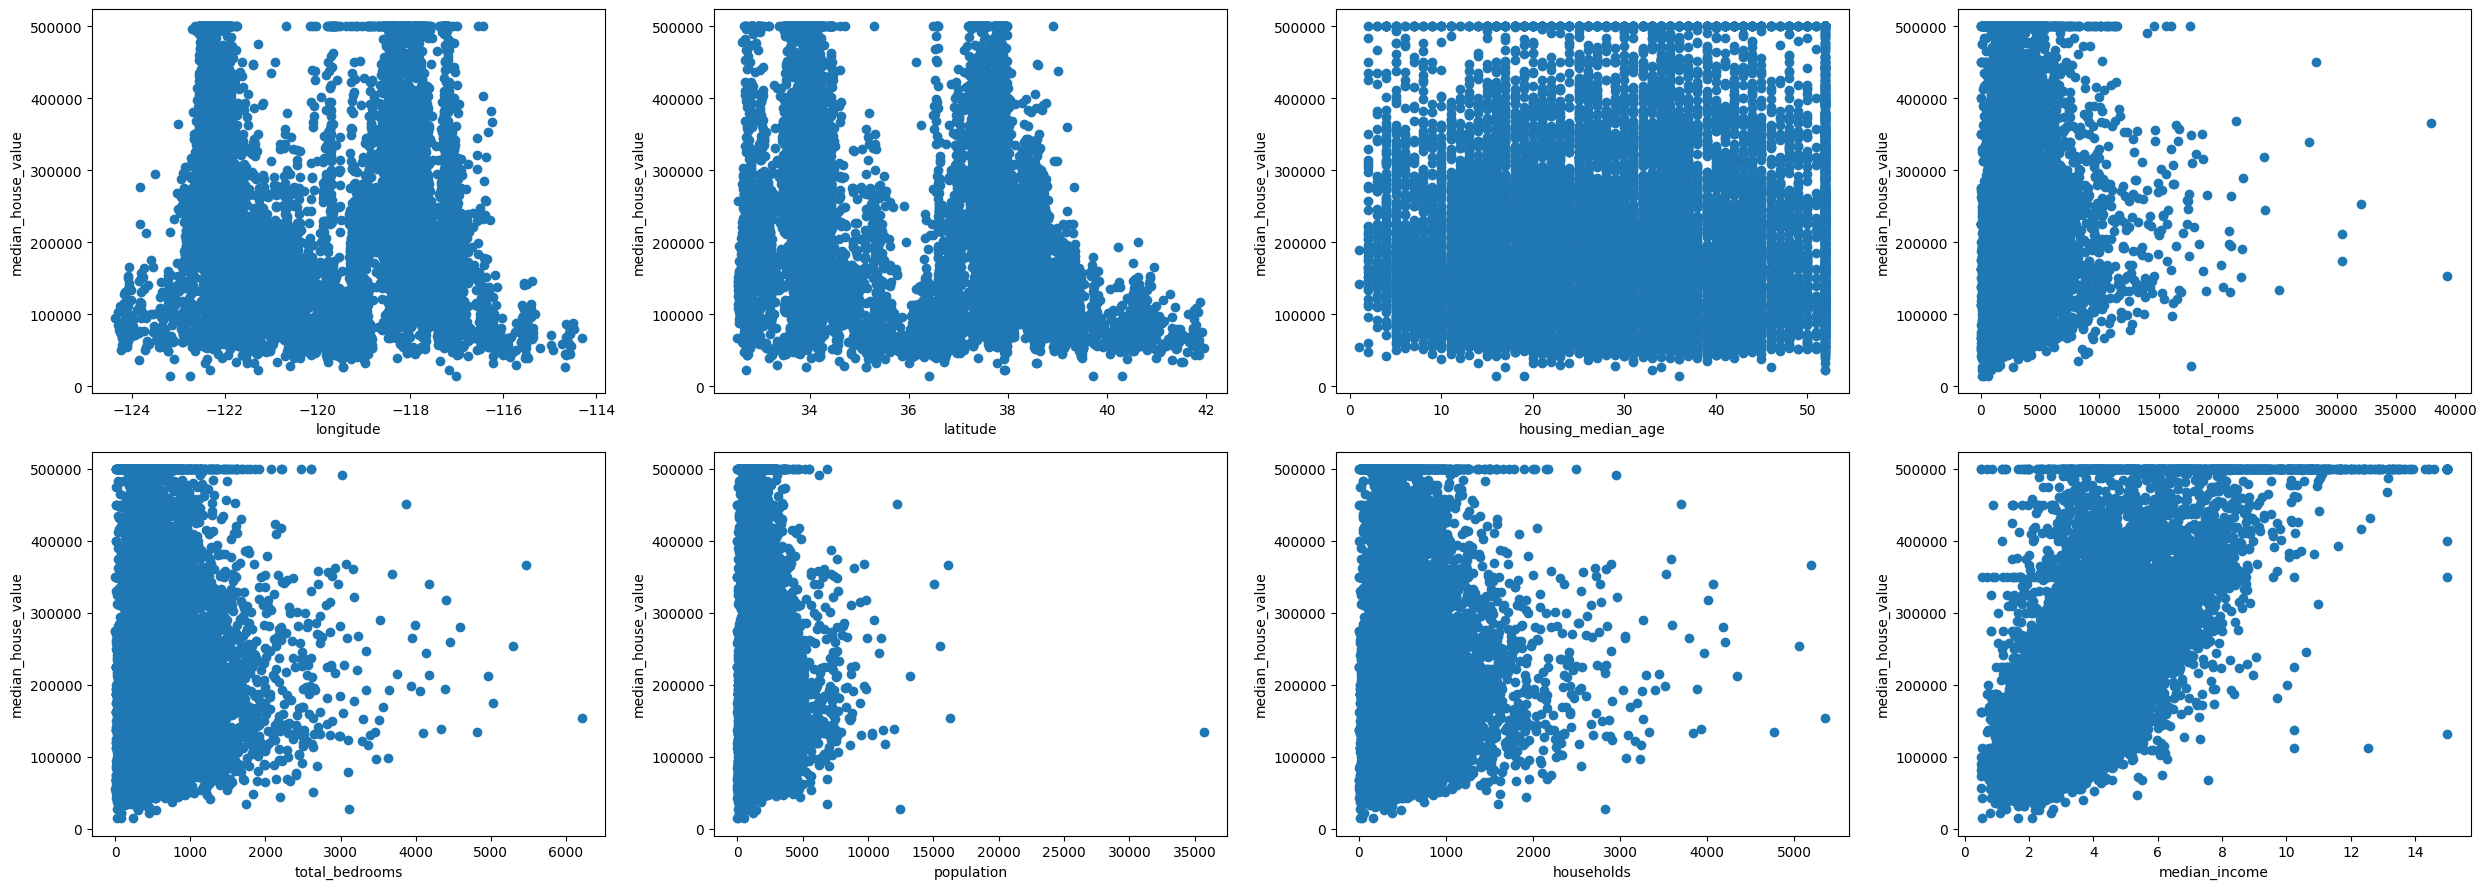

In [15]:
numeric_columns = train_copy.select_dtypes(include=['int64', 'float64'])
numeric_columns.drop(columns='median_house_value', inplace=True)
fig, axs = plt.subplots(2, 4, figsize=(25, 9))
i=0
j=0
for row, col in enumerate(numeric_columns.columns):
    axs[i, j].scatter(train_copy[col], train_copy['median_house_value'])
    axs[i, j].set_xlabel(col)
    axs[i, j].set_ylabel('median_house_value')
    j+=1
    if j==4:
        j=0
        i=1

plt.tight_layout()
plt.show()
# from the previous we can see that the most promosing attribute to predict the median house value is the median income

In [16]:
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"]=train_copy["population"]/train_copy["households"]

In [ ]:
corr_matrix=train_copy.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)
# bedrooms_per_room is more correlated to median_house_value than total_room and total_bedrooms
# rooms_per_household is more correlated to median_house_value than total_room and households

#results backup:
#median_house_value          1.000000
#median_income               0.687151
#rooms_per_household         0.146255
#total_rooms                 0.135140
#housing_median_age          0.114146
#households                  0.064590
#total_bedrooms              0.047781
#population_per_household   -0.021991
#population                 -0.026882
#longitude                  -0.047466
#latitude                   -0.142673
#bedrooms_per_room          -0.259952
#Name: median_house_value, dtype: float64

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

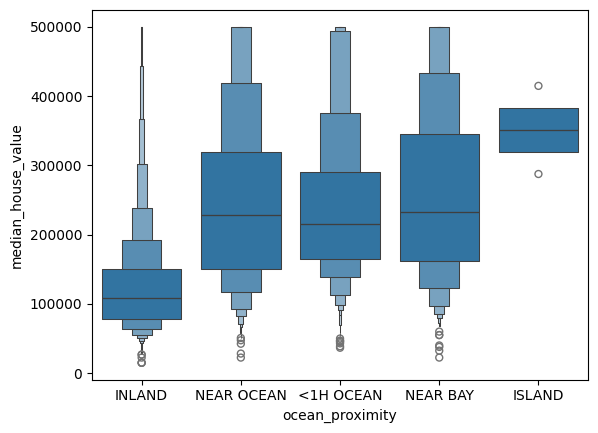

In [18]:
sns.boxenplot(data=train_copy, y='median_house_value', x='ocean_proximity')

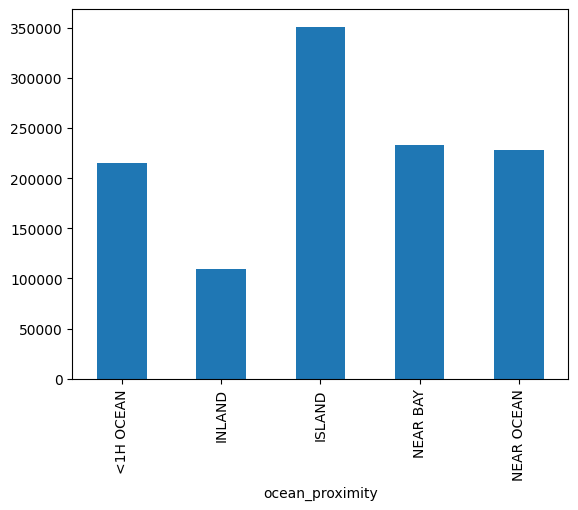

In [19]:
tmp = train_copy.groupby('ocean_proximity')['median_house_value'].median()
tmp.plot.bar()
plt.show()

Data cleaning and preprocessing

In [38]:
copy_train=train.copy()
X_train=copy_train.drop(columns='median_house_value')
y_train=copy_train['median_house_value'].copy()


#前置代码
processed_X_train=full_pipline.fit_transform(X_train)

# 将原始测试集划分为特征和目标值
# Split test set into features (X_test) and target variable (y_test)

X_test=test.drop(columns='median_house_value')
y_test=test['median_house_value']

# Apply the same preprocessing pipeline used on training data to the test features
# 对测试特征应用与训练时相同的预处理流程
processed_X_test=full_pipline.transform(X_test)


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=True):
        # 三个参数默认都是True，如果后续创建实例的时候不再强制覆盖，就直接用True了。
        
        # 这里尤其注意，当不指定 add_population_per_household 的值，它会默认是 True，但是！！！
        # 因为其实在num_pipeline 中创建 CombinedAttributeAdder 的一个具体实例时候，add_population_per_household 的值被强行设置为了False，
        # 所以显式地传递了 add_population_per_household=False，最终显式传递的值会覆盖默认值！也就是最后会是False起作用
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
    def fit(self, X, y=None):
        return self
    def transform(self,X, y=None):
        if self.add_bedrooms_per_room==1:
            bedrooms_per_room=X[:, bedrooms_ix] / X[:, rooms_ix]
            bedrooms_per_room=np.log(bedrooms_per_room+1)
            X=np.c_[X, bedrooms_per_room]
        if self.add_rooms_per_household==1:
            rooms_per_household=X[:, rooms_ix] / X[:, households_ix]
            rooms_per_household=np.log(rooms_per_household+1)
            X=np.c_[X, rooms_per_household]
        if self.add_population_per_household==1:
            population_per_household=X[:, population_ix] / X[:, households_ix]
            population_per_household=np.log(population_per_household+1)
            X=np.c_[X, population_per_household]
            X[rooms_ix]=np.log(X[rooms_ix]+1)
            X[bedrooms_ix]=np.log(X[bedrooms_ix]+1)
            X[population_ix]=np.log(X[population_ix]+1)
            X[households_ix]=np.log(X[households_ix]+1)
        return X

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder(add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=False)),
    # 之前def __init__(self, add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=True)
    # 注释已经提醒过，默认3个参数都是True，但是这里我们强制add_population_per_household=False 所以这一行其实后面就不见啦 因为我们给他False隐藏了。
    # 在实际运行中，CombinedAttributeAdder 这个转换器实例的 transform 方法就不会创建 population_per_household 这个新特征，不过前两个特征依然会创建。
    ('std_scaler', StandardScaler()),
])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_attribs = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_attribs=['ocean_proximity']
full_pipline=ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
#processed_X_train=full_pipline.fit_transform(X_train)这段代码需要提前，已前置

Machine learning regression models

In [42]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(processed_X_train, y_train)


#LinearRegression

#Parameters
#fit_intercept 	True
#copy_X 	True
#tol 	1e-06
#n_jobs 	None
#positive 	False


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
predictions=reg.predict(processed_X_train)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
error=mean_squared_error(y_train, predictions)
error=np.sqrt(error)
error

#np.float64(68535.1932648052)

np.float64(68535.1932648052)

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()

tree_reg.fit(processed_X_train, y_train)


#DecisionTreeRegressor
#Parameters
#criterion 	'squared_error'
#splitter 	'best'
#max_depth 	None
#min_samples_split 	2
#min_samples_leaf 	1
#min_weight_fraction_leaf 	0.0
#max_features 	None
#random_state 	None
#max_leaf_nodes 	None
#min_impurity_decrease 	0.0
#ccp_alpha 	0.0
#monotonic_cst 	None

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [46]:
tree_predictions=tree_reg.predict(processed_X_train)
tree_error=mean_squared_error(y_train, tree_predictions)
tree_error

#0.0！！！sign of overfitting！！

0.0

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rsme_scores=np.sqrt(-scores)
tree_rsme_scores.mean()


# np.float64(69896.8729818053)

np.float64(70083.29409612138)

In [48]:
lin_reg_scores=cross_val_score(reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores=np.sqrt(-lin_reg_scores)
lin_rmse_scores.mean()



np.float64(68847.73528687088)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(random_state=42)
# add random_state=42 to fix the output result, 
# reproduce the same results for debug use only, add by XD

# orginal code 
# forest_reg=RandomForestRegressor()

forest_reg.fit(processed_X_train, y_train)
forest_reg_scores=cross_val_score(forest_reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse=np.sqrt(-forest_reg_scores.mean())
forest_rmse




np.float64(49849.13504097302)

First attampt: GridSearchCV

Second attampt: RandomizedSearchCV

In [50]:
# First attampt: GridSearchCV

"""

from sklearn.model_selection import GridSearchCV
param_grid=[
    #{'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},#original code, comment by XD
    
    {'n_estimators': [30, 50, 100, 200],
     'max_features':[2, 4, 6, 8],
     'min_samples_leaf': [1, 2, 4], # add "min_samples_leaf"
     'max_depth': [10, 20, 30, None]    # add "max_depth"，"None" means no limitation for the depth
     },# modify by XD, Further Random Forest Hyper-parameter Tuning the model
     #组合数： 4×4×3×4=192 种组合（这里 bootstrap 默认为 True）
    
   
    #{'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}#original code, comment by XD
    
    {'bootstrap':[False],
     'n_estimators':[3, 10,30], # expand n_estimators
     'max_features':[2, 3, 4]
     }
     #组合数： 1×3×3=9 种组合。（bootstrap: False)
]
#total组合数： 192+9=201 种不同的超参数组合。超级慢啊啊啊啊

grid_search=GridSearchCV(
    forest_reg, # the added random_state=42 will pass via forest_reg, comment by XD
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)
grid_search.fit(processed_X_train, y_train)

"""
# Second attampt: RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#forest_reg=RandomForestRegressor(random_state=42) 
# #这行用的是刚才的forest_reg，前面已经写过了。再次写在这里，提示一下。

# --- 定义参数分布 param_distributions ---
# param_distributions 是 RandomizedSearchCV 的参数字典，使用分布或离散值列表

param_distributions = {
    'n_estimators': randint(low=50, high=301), # 例如，50 到 300 之间 (high=301 是为了包含 300)
    'max_features': randint(low=2, high=processed_X_train.shape[1] + 1), 
    # max_features决定在构建森林中的每一棵决策树时，在每个节点进行分裂时，算法会随机考虑多少个属性(feature)。
    # 本句的意思是根据processed_X_train数据集中属性的总数量，动态地从2到（总属性数）的范围中随机选择整数值作为max_features
    
    # low=2：这表示 max_features 的最小值将是 2。也就是说，在每次分裂时，模型至少会考虑 2 个属性。
    # 设置一个下限是为了确保模型不会只考虑 1 个属性，这通常会使树的准确性变得非常弱。


    # processed_X_train.shape: 这是一个 NumPy 数组的属性，返回一个元组，表示数组的维度。
    # processed_X_train.shape[1] 返回的是经过所有预处理（包括attribute engineering属性工程和OneHotEncoder独热编码）之后，最终用于模型训练的那些filter出来的总的属性数量。
    
    # 如果看不懂上面的描述 下面举个例子 比如我们有一个下面的水果dataset
    #fruits | price | products ID | used by date
    #apple |1.59|0123|2025-07-09|
    #pear |2.99|1254|2025-07-15|
    #banana |1.49|3689|2025-07-16|

    #在上面的水果例子里，假设你的目标变量是 price，那么你的原始特征集 X_train 会包含 fruits、products ID 和 used by date 这三列。
    # processed_X_train.shape[1] 这一项将会返回 5。
    #这 5 列很可能是：
    #1. products ID (标准化并可能经过对数转换)
    #2. shelf_life_days (标准化并可能经过对数转换)
    #3. fruits_apple (0 或 1)
    #4. fruits_banana (0 或 1)
    #5. fruits_pear (0 或 1)




    
    #动态适应数据：通过使用 processed_X_train.shape[1] + 1，
    # 这个 param_distributions 不会因为你的数据中属性数量的变化而需要手动调整。
    #无论你经过预处理后有多少个属性，它都会自动确保 max_features 的搜索上限是所有可用属性的数量。
    # processed_X_train.shape[1] + 1，
    # 为何+ 1: 这是因为 randint(low, high) 函数的 high 参数是不包含的（exclusive）。
    
    # 总结：
    # 在每次随机采样超参数组合时，max_features 的值应该是一个整数，
    # 它将从 2 到你经过预处理后的训练数据 (processed_X_train) 中所有属性的总数量这个范围中随机选取。
    # 这样做的目的是为了探索不同数量的随机属性子集对模型性能的影响。



    'max_depth': [10, 20, 30, 50, None], # 明确列出深度选项
    'min_samples_leaf': randint(low=1, high=10), # 例如，1 到 9 之间(high=10 是为了包含 9)
    'bootstrap': [True, False]  # 随机选择 True 或 False
}

# --- 实例化 RandomizedSearchCV ---
# 刚才First attampt我们把结果赋值给grid_search
# 现在Second attampt我们把结果赋值给新建的random_search
random_search = RandomizedSearchCV(
    estimator=forest_reg,# 使用之前定义并设置了random_state的forest_reg实例
    param_distributions=param_distributions,
    n_iter=100, # 核心参数！指定你要随机尝试多少种组合。这个数字决定了搜索的深度和运行时间。
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42, # 确保可复现性
    n_jobs=-1, # 使用所有核心
    return_train_score=True
)

print("开始 RandomizedSearchCV...") #提示词
random_search.fit(processed_X_train, y_train)
print("RandomizedSearchCV 完成！")#提示词

开始 RandomizedSearchCV...
RandomizedSearchCV 完成！


In [51]:

# --- First attampt: GridSearchCV
#grid_search.best_params_ 
#random_search # Second Attampt: Randomized Search Regressor


# --- Second attampt: Randomized Search
# --- 查看最佳结果 (现在使用 random_search 对象) ---
print("\n--- RandomizedSearchCV 最佳结果 ---")
print("最佳参数:", random_search.best_params_)
print("最佳模型（交叉验证平均RMSE）:", np.sqrt(-random_search.best_score_))


#--- RandomizedSearchCV 最佳结果记录备份 ---
#最佳参数: {'bootstrap': False, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 267}
#最佳模型（交叉验证平均RMSE）: 49057.14437429714


--- RandomizedSearchCV 最佳结果 ---
最佳参数: {'bootstrap': False, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 267}
最佳模型（交叉验证平均RMSE）: 49057.14437429714


#First attampt: GridSearchCV

grid_search.best_params_ 

#Output Results:

{'max_depth': None,
 'max_features': 8,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [52]:
# --- 5. 获取并检查所有组合的结果 (使用 grid_search 对象) ---
#First Attampt:RandomForestRegressor

#grid_search.best_estimator_ 

"""

### Model`RandomForestRegressor`

- **best parameters**：
  - `n_estimators`: 200
  - `max_features`: 8
  - `random_state`: 42
- **default parameters**（others）：
  - `bootstrap`: True
  - `criterion`: 'squared_error'
  - `max_depth`: None
  - `min_samples_split`: 2
  - `min_samples_leaf`: 1
  - `max_leaf_nodes`: None
  - ...

- **Full Display**：
```python
RandomForestRegressor(max_features=8, n_estimators=200, random_state=42)
```

"""
# --- 5. 获取并检查所有组合的结果 (使用 random_search 对象) ---
random_search.best_estimator_ #Second Attampt:Randomized Search Regressor
#
#RandomForestRegressor Parameters
#n_estimators 	267
#criterion 	'squared_error'
#max_depth 	50
#min_samples_split 	2
#min_samples_leaf 	2
#min_weight_fraction_leaf 	0.0
#max_features 	7
#max_leaf_nodes 	None
#min_impurity_decrease 	0.0
#bootstrap 	False
#oob_score 	False
#n_jobs 	None
#random_state 	42
#verbose 	0
#warm_start 	False
#ccp_alpha 	0.0
#max_samples 	None
#monotonic_cst 	None

,n_estimators,267
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [53]:
#results = grid_search.cv_results_ # First Attampt: RandomForestRegressor


results = random_search.cv_results_ # Second Attampt: Randomized Search Regressor




print("\n--- 所有随机搜索组合的结果（RMSE及参数）---")
# 对这些结果进行排序，以便更容易找到最佳或次优的
sorted_results = sorted(zip(results['mean_test_score'], results['params']), key=lambda x: x[0], reverse=True)

# 优化display结果,遍历排序后的结果
for mean_score, params in sorted_results:
    print(f"RMSE:{np.sqrt(-mean_score)}, Params:{params}")
#Display RMSE results in descending orde

#original code

#for mean_score, params in zip(results['mean_test_score'], results['params']):
#    print(np.sqrt(-mean_score), params)





--- 所有随机搜索组合的结果（RMSE及参数）---
RMSE:49057.14437429714, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 267}
RMSE:49515.37759126886, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 2, 'n_estimators': 267}
RMSE:49699.16087001197, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 241}
RMSE:49756.23068410413, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 217}
RMSE:49771.64134786706, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 60}
RMSE:49793.35701748669, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 116}
RMSE:49870.79089868457, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 3, 'n_estimators': 157}
RMSE:49909.7643230708, Params:{'bootstrap': Fa

Second Attampt:
--- 所有随机搜索组合的结果（RMSE及参数）---
RMSE:49057.14437429714, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 2, 'n_estimators': 267}
RMSE:49515.37759126886, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 2, 'n_estimators': 267}
RMSE:49699.16087001197, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 241}
RMSE:49756.23068410413, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 217}
RMSE:49771.64134786706, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 60}
RMSE:49793.35701748669, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 116}
RMSE:49870.79089868457, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 3, 'n_estimators': 157}
RMSE:49909.7643230708, Params:{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 104}
RMSE:49911.32117411506, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 3, 'n_estimators': 278}
RMSE:50032.56629655945, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 3, 'n_estimators': 112}
RMSE:50049.996962051766, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 3, 'n_estimators': 196}
RMSE:50135.894859881904, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 107}
RMSE:50226.96421884731, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 6, 'n_estimators': 209}
RMSE:50272.97490797703, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 133}
RMSE:50314.188835182904, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 65}
RMSE:50355.09230723891, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 12, 'min_samples_leaf': 4, 'n_estimators': 62}
RMSE:50362.80728756889, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 6, 'n_estimators': 107}
RMSE:50368.213109295706, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 6, 'n_estimators': 107}
RMSE:50419.351545800484, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 247}
RMSE:50488.79497624358, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 11, 'min_samples_leaf': 4, 'n_estimators': 63}
RMSE:50497.30959496906, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 97}
RMSE:50522.194234930634, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 10, 'min_samples_leaf': 5, 'n_estimators': 274}
RMSE:50598.61851441206, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 8, 'min_samples_leaf': 8, 'n_estimators': 224}
RMSE:50757.921461151105, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 185}
RMSE:50758.937723799405, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 96}
RMSE:50801.787349095524, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 5, 'n_estimators': 73}
RMSE:50926.59492971235, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 9, 'n_estimators': 85}
RMSE:50981.02534783509, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 11, 'min_samples_leaf': 7, 'n_estimators': 141}
RMSE:51019.24003306417, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 135}
RMSE:51020.612578746695, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 9, 'n_estimators': 98}
RMSE:51216.079200063105, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 11, 'min_samples_leaf': 7, 'n_estimators': 139}
RMSE:51238.053796743254, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 7, 'n_estimators': 250}
RMSE:51315.20475961416, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 209}
RMSE:51328.9202439288, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 11, 'min_samples_leaf': 7, 'n_estimators': 75}
RMSE:51364.7875579222, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 6, 'n_estimators': 168}
RMSE:51450.40366593158, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 6, 'n_estimators': 77}
RMSE:51474.27416352853, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 8, 'n_estimators': 103}
RMSE:51504.08837443465, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 7, 'n_estimators': 67}
RMSE:51520.66588490708, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 262}
RMSE:51539.14969727059, Params:{'bootstrap': False, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6, 'n_estimators': 57}
RMSE:51551.04843103611, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 14, 'min_samples_leaf': 8, 'n_estimators': 238}
RMSE:51557.03284306194, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 13, 'min_samples_leaf': 8, 'n_estimators': 256}
RMSE:51662.91425257519, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 7, 'n_estimators': 243}
RMSE:51696.96866361135, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 192}
RMSE:51710.41118189893, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 7, 'n_estimators': 244}
RMSE:51761.42379631567, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 8, 'n_estimators': 62}
RMSE:51778.55703455354, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 225}
RMSE:51809.27324750574, Params:{'bootstrap': False, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 196}
RMSE:51817.485247401135, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 243}
RMSE:51896.649517823724, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 8, 'min_samples_leaf': 8, 'n_estimators': 172}
RMSE:51906.45402073396, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 236}
RMSE:51983.09301348539, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 7, 'n_estimators': 176}
RMSE:52155.10799887996, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 7, 'min_samples_leaf': 8, 'n_estimators': 133}
RMSE:52168.48648321755, Params:{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 73}
RMSE:52431.82136322437, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 7, 'n_estimators': 179}
RMSE:52460.46264270773, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 13, 'min_samples_leaf': 4, 'n_estimators': 79}
RMSE:52538.755633710316, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 13, 'min_samples_leaf': 5, 'n_estimators': 274}
RMSE:52629.291849796246, Params:{'bootstrap': False, 'max_depth': None, 'max_features': 13, 'min_samples_leaf': 5, 'n_estimators': 152}
RMSE:52655.542360851985, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 13, 'min_samples_leaf': 5, 'n_estimators': 210}
RMSE:52746.920370355685, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 7, 'n_estimators': 240}
RMSE:52843.28392618038, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8, 'n_estimators': 201}
RMSE:53238.50237449322, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 193}
RMSE:53300.30840026952, Params:{'bootstrap': True, 'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 7, 'n_estimators': 124}
RMSE:53397.05709893754, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 8, 'n_estimators': 263}
RMSE:53699.82173484362, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 79}
RMSE:53755.856073587005, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 179}
RMSE:53969.52634375182, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 4, 'n_estimators': 124}
RMSE:54021.590167600625, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 3, 'n_estimators': 196}
RMSE:54123.89166259359, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
RMSE:54185.9363972922, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 5, 'n_estimators': 144}
RMSE:54197.51991662951, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 6, 'n_estimators': 225}
RMSE:54258.69881415848, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 5, 'n_estimators': 55}
RMSE:54340.919995327786, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 8, 'n_estimators': 265}
RMSE:54708.63859910234, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 150}
RMSE:54719.50735814506, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 8, 'n_estimators': 285}
RMSE:54725.23355504962, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 6, 'n_estimators': 64}
RMSE:54731.22376769952, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 4, 'n_estimators': 271}
RMSE:54774.425347188575, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 51}
RMSE:54862.184864972165, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 233}
RMSE:54976.03544593229, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 14, 'min_samples_leaf': 9, 'n_estimators': 277}
RMSE:54981.02084221116, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 14, 'min_samples_leaf': 9, 'n_estimators': 294}
RMSE:55045.67980109294, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 240}
RMSE:55112.54857508912, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 9, 'n_estimators': 52}
RMSE:55235.82409848517, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 153}
RMSE:55322.01786534946, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 111}
RMSE:55559.86368999775, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 8, 'n_estimators': 112}
RMSE:55645.38321394675, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 283}
RMSE:55656.121254628895, Params:{'bootstrap': True, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 267}
RMSE:55836.109445596194, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 97}
RMSE:55891.144362024155, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 110}
RMSE:55905.39220490009, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 173}
RMSE:56089.43123619524, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 9, 'n_estimators': 206}
RMSE:56278.2379376445, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 2, 'n_estimators': 299}
RMSE:56494.20455801659, Params:{'bootstrap': False, 'max_depth': 50, 'max_features': 14, 'min_samples_leaf': 2, 'n_estimators': 173}
RMSE:57054.40720994721, Params:{'bootstrap': True, 'max_depth': 50, 'max_features': 2, 'min_samples_leaf': 8, 'n_estimators': 287}
RMSE:57326.63781838478, Params:{'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 6, 'n_estimators': 97}
RMSE:57749.60803994392, Params:{'bootstrap': True, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 120}
RMSE:60067.719203854904, Params:{'bootstrap': False, 'max_depth': 30, 'max_features': 15, 'min_samples_leaf': 9, 'n_estimators': 148}
RMSE:61530.52674035898, Params:{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 76}
RMSE:61600.34922386784, Params:{'bootstrap': False, 'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 6, 'n_estimators': 103}




<details>
<summary>Click to expand: Full results (First Attempt) from RandomForestRegressor Grid Search (mean_score & parameters)</summary>



"""
### Model 模型：`RandomForestRegressor`
### Results (mean_score & parameters) 运行结果：

61447.9691376009 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
61044.78883862878 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
60332.196842660596 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}
60093.041215861755 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200}
61582.78627621235 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 30}
61128.855998717256 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 50}
60362.25874321602 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
60310.70422748714 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
61793.919303760034 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 30}
61392.2289871003 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 50}
60683.80337278721 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100}
60522.73101790166 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 200}
56298.47706295263 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 30}
56130.89232557424 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
56047.59317330064 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
55872.19906928972 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
56103.09503452384 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 30}
55900.25292252199 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 50}
55852.54977202124 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
55922.17788842084 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 200}
56403.56643063942 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 30}
56242.74508175175 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}
56131.70792453177 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
56080.69081711044 {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
55356.002711355075 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 30}
54958.91442245848 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 50}
55028.21884779633 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 100}
54848.180506650824 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 200}
55165.7988691618 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 30}
54817.51300957168 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 50}
54777.127167230465 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}
54743.45501407994 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 200}
55298.57828282939 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 30}
54902.119664656966 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 50}
54864.508107489324 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
54855.33742976386 {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 200}
54998.77500659323 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 30}
54760.50141798151 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 50}
54501.782214252555 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
54485.46960986426 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200}
54630.42193438094 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 30}
54512.134821623884 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 50}
54363.476686183894 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
54356.423967039984 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 200}
54792.06995375866 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 30}
54614.10206615563 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}
54407.12048522676 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
54398.82400471823 {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 200}
54390.798850056686 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
53736.37562103645 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
53187.9499577654 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}
52953.756455892784 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200}
54709.13487343498 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 30}
54423.067348644705 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 50}
54029.939631008056 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
53815.99804347741 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
56308.334102689885 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 30}
55877.117723466516 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 50}
55299.63228473484 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100}
55144.30066956505 {'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 200}
51655.58071628392 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 30}
51310.766743079206 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
51062.062777075684 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
50869.278724974785 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
51591.04143385033 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 30}
51316.51308329807 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 50}
51195.68449673146 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
51126.64570050879 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 200}
52662.54048706746 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 30}
52410.09545626649 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}
52195.75912460554 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
52044.7624573542 {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
50997.68677094544 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 30}
50398.53264842059 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 50}
50203.72589218522 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 100}
50069.23078250233 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 200}
51083.01758030699 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 30}
50636.36162612717 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 50}
50377.48981133089 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}
50168.95007642469 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 200}
51574.04538412336 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 30}
51185.979560375425 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 50}
51094.47546049798 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
50979.37033379864 {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 200}
50806.45184591185 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 30}
50367.50743643438 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 50}
50069.517297214996 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
49925.34605665169 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200}
50752.64578844164 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 30}
50415.657061707796 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 50}
50000.565460944956 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
49885.02449002788 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 200}
51157.06208897198 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 30}
50835.28026750143 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}
50614.24909817557 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
50567.85058216347 {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 200}
54284.586432222866 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
53724.779867174315 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
53085.290001122135 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}
52886.00301268416 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200}
54676.76302859642 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 30}
54410.60928059402 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 50}
53933.02174491249 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
53722.5365398492 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
56010.31159396273 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 30}
55776.09130975458 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 50}
55213.666879291115 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100}
55083.7669011405 {'max_depth': 30, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 200}
51549.53496422776 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 30}
51149.66828178464 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
50887.97541723232 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
50761.82588926336 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
51685.23824072283 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 30}
51404.96470806582 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 50}
51202.55184193674 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
51020.43360216939 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 200}
52532.20705442285 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 30}
52245.46825260309 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}
51996.60894072066 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
51957.57739773384 {'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
50837.3128187151 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 30}
50245.099093183984 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 50}
50167.60515462123 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 100}
50063.946560026954 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 200}
50896.568668211105 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 30}
50489.28747385483 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 50}
50312.66030849097 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}
50162.710413624765 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 200}
51412.170148582874 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 30}
51069.80103370773 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 50}
50989.065834152825 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
50940.41240543032 {'max_depth': 30, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 200}
50830.892399887154 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 30}
50276.216446476734 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 50}
49911.40331974489 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
49765.34808218721 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200}
50627.448314741145 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 30}
50291.38133037173 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 50}
49975.03065935786 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
49839.923183022314 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 200}
51072.793453374565 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 30}
50723.763901150436 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}
50480.07261350982 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
50459.13429762022 {'max_depth': 30, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 200}
54242.37639565583 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
53731.39063220962 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
53162.453995048825 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 100}
52965.17841923238 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 200}
54704.972309635676 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 30}
54446.95082260879 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 50}
53928.99317825483 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
53740.4641575963 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
56009.56625678486 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 30}
55774.85503721702 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 50}
55217.66900939346 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 100}
55088.34513575858 {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 200}
51688.8739271331 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 30}
51141.521876553335 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 50}
50914.32220725321 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
50766.580261079536 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
51730.81131012582 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 30}
51428.936614681836 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 50}
51175.86351733732 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
50990.24199392209 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 200}
52538.970274158404 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 30}
52249.80170950402 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 50}
51999.24126700513 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 100}
51955.832315923835 {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 200}
51049.4057318436 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 30}
50427.337532920326 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 50}
50155.36851918424 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 100}
49972.6237131289 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 200}
50921.25063946977 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 30}
50564.07513470914 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 50}
50375.20957753498 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 100}
50183.99793673542 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2, 'n_estimators': 200}
51412.170148582874 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 30}
51069.80103370773 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 50}
50989.065834152825 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 100}
50941.62840777321 {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4, 'n_estimators': 200}
50899.299085444974 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 30}
50372.455498265546 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 50}
49867.95148590699 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
49739.05945240017 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 200}
50653.79839521043 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 30}
50314.52110862199 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 50}
49981.62953481164 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 100}
49837.98201918044 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 200}
51072.793453374565 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 30}
50723.763901150436 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}
50480.07261350982 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 100}
50459.13429762022 {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 200}
64539.468248970785 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55541.435220163185 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
53062.48305218515 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
61676.20643955846 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53782.93737882131 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
51182.903193145816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
61053.24330493177 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
53076.85467049483 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
50500.27432512379 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

"""

</details>



In [55]:
# --- 6. 获取特征重要性 
# (First Attampt 使用 grid_search.best_estimator_) GridSearchCV ---
# (Second Attampt 使用 random_search.best_estimator_) ---

#feature_importances = grid_search.best_estimator_.feature_importances_ # First Attampt: GridSearchCV

feature_importances = random_search.best_estimator_.feature_importances_ # Second Attampt: Randomized Search Regressor


#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] #原始代码 但是属性的顺序应该不对，需要更正

#extra_attribs = ["bedrooms_per_room", "rooms_per_hhold", "pop_per_hhold"] #属性顺序更正后的原始代码

extra_attribs = ["bedrooms_per_room", "rooms_per_hhold"] ##属性顺序更正后的Second Attampt代码
#因为之前的模块 CombinedAttributeAdder(add_bedrooms_per_room=True, add_rooms_per_household=True, add_population_per_household=False)),
# 所以population_per_household这个传入值就没有了。

cat_encoder = full_pipline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
## Extract category names from the fitted categorical encoder and store them in a list



# 组合所有特征名称，确保顺序与processed_X_train中一致：
# 原始数值特征 + 新增派生数值特征 + 独热编码分类特征

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
# Combine numerical, extra, and one-hot encoded categorical attributes
# 将数值型属性、额外属性和独热编码的类别属性合并为一个特征名称列表。

#sorted(zip(feature_importances, attributes), reverse=True)

print("\n--- 特征重要性排序 ---")
for importance, attribute in sorted(zip(feature_importances, attributes), reverse=True):
# Sort features by importance (descending) and print them
# 按照重要性从高到低排序，依次遍历每个特征及其对应的重要性。
    print(f"{attribute}: {importance:.4f}")
    # Print feature name and its importance (4 decimal places)
    # 打印每个特征名称和它的重要性值，保留四位小数。


#--- 特征重要性排序 ---
#median_income: 0.3586
#INLAND: 0.1633
#longitude: 0.1070
#latitude: 0.0947
#bedrooms_per_room: 0.0717
#rooms_per_hhold: 0.0546
#housing_median_age: 0.0444
#population: 0.0284
#total_rooms: 0.0197
#total_bedrooms: 0.0196
#households: 0.0183
#<1H OCEAN: 0.0101
#NEAR OCEAN: 0.0065
#NEAR BAY: 0.0029
#ISLAND: 0.0000


AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [37]:
# Third Attampt
#--- Ensemble Method: GradientBoostingRegressor (seperate assignment)

print("\n--- GradientBoostingRegressor (Default Parameters) ---")
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate and train default GBR
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(processed_X_train, y_train)
# Evaluate default GBR (CV and Test Set)
gb_reg_scores = cross_val_score(gb_reg, processed_X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gb_rmse_cv_default = np.sqrt(-gb_reg_scores.mean())
print(f"Default GBR CV RMSE: {gb_rmse_cv_default:.4f}")
gb_predictions_test_default = gb_reg.predict(processed_X_test) # Needs processed_X_test
gb_rmse_test_default = np.sqrt(mean_squared_error(y_test, gb_predictions_test_default))
print(f"Default GBR Test RMSE: {gb_rmse_test_default:.4f}")


print("\n--- GradientBoostingRegressor (RandomizedSearchCV Tuning) ---")
# Define param_distributions for GBR
gb_param_distributions = {
    'n_estimators': randint(low=100, high=501),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': randint(low=3, high=11),
    'subsample': uniform(loc=0.6, scale=0.4),
    'max_features': [0.6, 0.8, 1.0, None]
}
# Instantiate and fit RandomizedSearchCV for GBR
gb_random_search = RandomizedSearchCV(
    estimator=gb_reg,
    param_distributions=gb_param_distributions,
    n_iter=50, # Adjust as needed
    cv=5, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error'
)
gb_random_search.fit(processed_X_train, y_train)
# Print GBR best params and RMSE
print("Best Parameters (GBR):", gb_random_search.best_params_)
gb_rmse_cv_tuned = np.sqrt(-gb_random_search.best_score_)
print(f"Tuned GBR CV RMSE: {gb_rmse_cv_tuned:.4f}")
# Evaluate tuned GBR on test set
gb_final_model = gb_random_search.best_estimator_
gb_final_predictions_test = gb_final_model.predict(processed_X_test)
gb_rmse_test_tuned = np.sqrt(mean_squared_error(y_test, gb_final_predictions_test))
print(f"Tuned GBR Test RMSE: {gb_rmse_test_tuned:.4f}")



--- GradientBoostingRegressor (Default Parameters) ---
Default GBR CV RMSE: 55541.4987


NameError: name 'processed_X_test' is not defined

In [ ]:
# --- 7. 最终模型在测试集上的评估 Final Model Selection and Evaluation
# (5.2 使用 random_search.best_estimator_) ---
# 注释掉旧的引用

#final_model=grid_search.best_estimator_ # First Attampt: grid_search

#final_model=random_search.best_estimator_  # Second Attampt: Randomized Search Regressor


final_model=gb_random_search.best_estimator_  # Third Attampt: GradientBoostingRegressor-GBR




# Make predictions on the processed test data using the final model
# 使用最终模型对处理后的测试集特征进行预测
final_predictions=final_model.predict(processed_X_test)

# Calculate the Mean Squared Error between actual and predicted values
# 计算预测值与实际值之间的均方误差（MSE）
final_mse=mean_squared_error(y_test, final_predictions)

#final_mse=np.sqrt(final_mse) # First Attampt
#final_mse # First Attampt
##1st attampt results:  np.float64(47973.04525198317)


# Take the square root of MSE to get RMSE (Root Mean Squared Error)
# 取均方误差的平方根，得到 RMSE，用于衡量回归模型的预测误差
# rename into "final_rmse" for Second Attampt
final_rmse = np.sqrt(final_mse) 

# Second Attampt - RandomizedSearchCV
# Print the RMSE result of the final model on the test set
# 打印最终模型（RandomizedSearchCV 最优模型）在测试集上的 RMSE
#print(f"\n最终模型（RandomizedSearchCV最佳模型）在测试集上的RMSE: {final_rmse}")


#print(f"\n The RMSE on the test set of the final model(RandomizedSearchCV Best Model): {final_rmse}")
#Second Attampt Results backup：最终模型数据存档（RandomizedSearchCV最佳模型）在测试集上的RMSE: 46528.95316631989

# Third Attampt-GBR Tuned
print(f"\nFinal Chosen Model (RF Tuned/GBR Tuned) Test RMSE: {final_rmse}")








最终模型（RandomizedSearchCV最佳模型）在测试集上的RMSE: 46528.95316631989


Analysis of Current Approach and Model Improvements 已有方法及模型改进分析:
1. Feature Engineering (创建新特征):
Created rooms_per_household, bedrooms_per_room, population_per_household.

Observation: rooms_per_household showed decent importance.

Improvements: bedrooms_per_room and population_per_household seems less useful, would there be some useful ratios or interactions?

2. Handling Categorical Features (处理类别特征):
Used One-Hot Encoding for ocean_proximity.

Observation: <1H OCEAN turned out to be a very important feature. 
 Improvements: Geographical location is very important. is there any bigger cities/towns/Large corporate headquarters cluster nearby which would affect the house price?

3. Numerical Feature Scaling & Transformation (数值特征缩放与转换):
Used StandardScaler for normalization.

Applied np.log(x+1) transformation to some features (total_rooms, total_bedrooms, population, households, and the newly created ratio features).(avoid to process log(0))

Observation: Log transformation often helps features with skewed distributions, making them more suitable for linear models or models sensitive to feature scales.

观察: 对数转换通常有助于处理偏态分布的特征，使其更适合线性模型或对特征尺度敏感的模型。

4. Model Selection & Training (模型选择与训练):
reg 68.5
tree_reg 70.3
cross_val_tree_reg 68.8
cross_val_forest_reg 49.8
final 47.9


Linear Regression: Simple, stable, but limited by its linear nature. RMSE was ~68.5k.

Decision Tree Regressor (untuned): overfitting (RMSE 0.0 on training set), poor generalization (CV RMSE ~70.3k). This clearly showed the need for regularization.

Random Forest Regressor (default): Significant improvement (CV RMSE ~49.8k). This indicated the power of ensemble methods.

5. Hyperparameter Tuning (超参数调优):
Used GridSearchCV on RandomForestRegressor with n_estimators, max_features, and bootstrap.

Observation: Achieved further reduction in RMSE to ~47.9k on the test set. This confirmed that tuning can yield better results.

观察: 进一步将 RMSE 降低到测试集上的约 47.9k。这证实了调优可以带来更好的结果。

6. Model Evaluation (模型评估):

Used RMSE (Root Mean Squared Error) via cross-validation and on a final held-out test set.

Observation: The consistency between CV RMSE and test set RMSE (~49.8k vs ~47.9k) indicates a well-generalized and stable model.

观察: 交叉验证 RMSE 和测试集 RMSE 之间的一致性 (约 49.8k vs 约 47.9k) 表明模型泛化良好且稳定。




Questions & Ideas for Further Improvement (按优先级排序)
High Value, Low Effort (高价值，低投入)

Refine Random Forest Hyperparameter Tuning (优化随机森林超参数调优):

Questions: Did best_params_ for n_estimators or max_features hit the boundary of your search grid (e.g., if best_params_['n_estimators'] was 30, maybe try higher values like 50, 100, 200)? What if we try other hyperparameters like min_samples_leaf, min_samples_split, max_depth?

Ideas to Try:

- Expand the param_grid for n_estimators (e.g., [50, 100, 200]).

- Add max_depth to param_grid (e.g., [10, 20, 30, None]). This directly controls individual tree overfitting.

- Add min_samples_leaf (e.g., [1, 2, 4, 8]).

- Consider RandomizedSearchCV for a wider, more efficient search space if param_grid becomes very large.

问题: n_estimators 或 max_features 的 best_params_ 是否达到了你搜索网格的边界 (例如，如果 best_params_['n_estimators'] 是 30，可以尝试更高的值如 50, 100, 200)？如果尝试其他超参数如 min_samples_leaf, min_samples_split, max_depth 会怎样？

尝试的想法:
扩大 n_estimators 的 param_grid (例如，[50, 100, 200])。
将 max_depth 添加到 param_grid (例如，[10, 20, 30, None])。这直接控制了单棵树的过拟合。
添加 min_samples_leaf (例如，[1, 2, 4, 8])。
如果 param_grid 变得非常大，考虑使用 RandomizedSearchCV 进行更广泛、更高效的搜索。

Medium Value, Medium Effort (中等价值，中等投入)
These require a bit more work but can lead to noticeable gains.
这些需要更多的工作，但可以带来显著的收益。

1. Explore Other Ensemble Models (探索其他集成模型):

Questions: Can Gradient Boosting models (e.g., GradientBoostingRegressor, XGBoost, LightGBM) perform better than Random Forest?

Ideas to Try:

Implement GradientBoostingRegressor from sklearn.ensemble. It often achieves competitive results.

(More advanced) Explore XGBoost or LightGBM which are highly optimized gradient boosting libraries, often leading to state-of-the-art performance in tabular data. These would require installing new libraries.

问题: 梯度提升模型 (例如 GradientBoostingRegressor, XGBoost, LightGBM) 是否能比随机森林表现更好？

尝试的想法:

实现 sklearn.ensemble 中的 GradientBoostingRegressor。它通常能达到有竞争力的结果。

(更高级) 探索 XGBoost 或 LightGBM，它们是高度优化的梯度提升库，通常在表格数据中带来最先进的性能。这些需要安装新的库。

Medium Value, Medium Effort (中等价值，中等投入)

2. Try to better Handling of ocean_proximity (更好地处理 ocean_proximity):

Questions: While one-hot encoding works, are there other ways to leverage geographical information? INLAND had very low importance, possibly because the model learns "not close to ocean" from <1H OCEAN and then treats other categories less specifically.

Ideas to Try:

Geographical Features: Calculate distance to the nearest coast/ocean or major city for each house using longitude and latitude. This could be a continuous numerical feature.

Clustering: Use K-Means or DBSCAN on longitude and latitude to create geographical clusters as new categorical features.

问题: 独热编码虽然有效，但还有其他方法可以利用地理信息吗？INLAND 的重要性非常低，可能是因为模型从 <1H OCEAN 中学习到“不靠近海洋”，然后对其他类别处理得不那么具体。

尝试的想法:

地理特征: 使用 longitude 和 latitude 计算每个房屋到最近海岸/海洋或主要城市的距离。这可以是一个连续的数值特征。

聚类: 在 longitude 和 latitude 上使用 K-Means 或 DBSCAN，创建地理聚类作为新的类别特征。

Low Value, High Effort (低价值，高投入)

Deep Learning (深度学习):

Questions: Can a neural network learn more complex patterns?

Ideas to Try: Build a simple Feed-Forward Neural Network using TensorFlow/Keras or PyTorch. While powerful, for tabular data like this, ensemble tree methods often perform equally well or better with less complexity.

问题: 神经网络能否学习更复杂的模式？

尝试的想法: 使用 TensorFlow/Keras 或 PyTorch 构建一个简单的前馈神经网络。虽然强大，但对于这种表格数据，集成树方法通常表现同样好或更好，且复杂性更低。